
## 支持向量机
   给定训练样本集D = $\{(x_1 , y_1) ,(x_2, y_2) , . . . , (x_m, y_m)\}$, $y_i \in \{-1 ,1\}$，分类学习最基本的想法就是基于训练集在样本空间中找到一个划分超平面、将不同类别的样本分开但能将训练样本分开的划分超平面可能有很多.
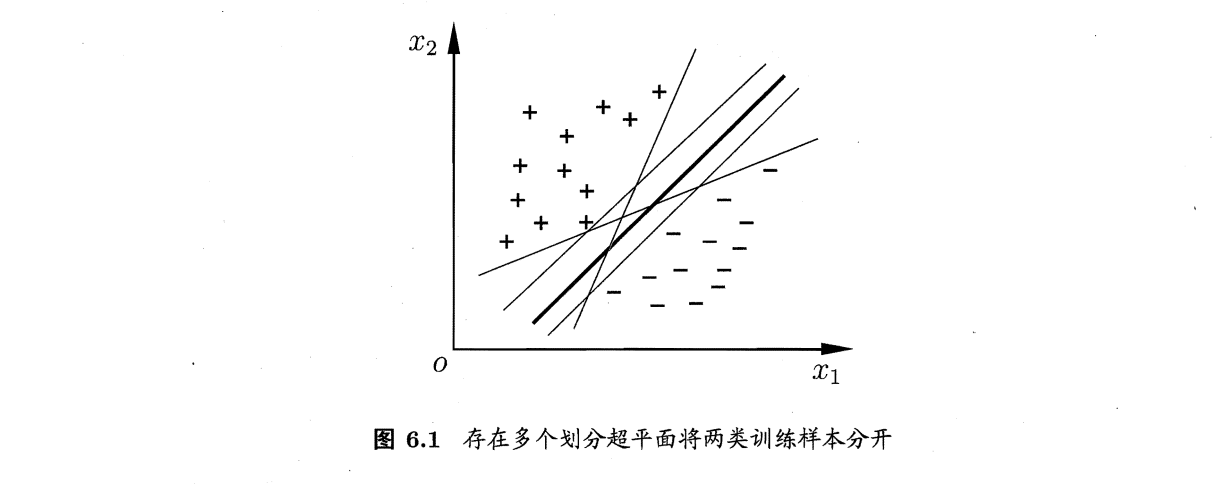
   在样本空间中，划分超平面可通过线性方程$\omega^Tx + b = 0$来描述。$\omega = (\omega_1,\omega_2,...,\omega_d)$为法向量决定超平面的方向，$b$为位移项，即可将超平面记为$(w , b)$, 样本空间中任意点$\omega$到超平面$(\omega, b)$的距离为$r = \frac{|\omega^Tx + b|}{||\omega||}$.
   
   假设超平面$(\omega, b)$能将训练样本正确分类，即对于$(x_i, y_i)\in D$, 若$y_i = +1$, 则有$\omega^Tx + b > 0$;若$y_i = -1$, 则有$\omega^Tx + b < 0$.令
   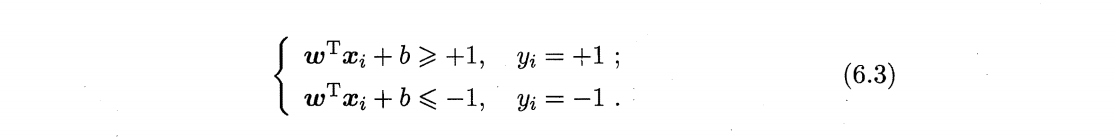
   距离超平面最近的这几个训练样本点使式(6.3) 的等号成立，它们被称为"支持向量" (support vector)，两个异类支持向量到超平面的距离之和(间隔)为$$\gamma = \frac{2}{||\omega||}$$
   欲找到具有"最大间隔" (maximum margin) 的划分超平面，也就是要找到能满足式(6.3) 中约束的参数$\omega$和$b$,使得 $\gamma$最大。又因为最大化间隔仅需要最大化$||\omega||^{-1}$, 等价于最小化$||\omega||^2$于是：$$\min\limits_{\omega,b} \frac{1}{2} ||\omega||^2 \\ s.t.  y_i(\omega^Tx + b)\geq 1, i = 1,2,...,m$$
   这就是支持向量机(Support Vector Machine ，简称 SVM) 的基本型.
## 对偶问题
   希望求解上面的基本型得到大间隔划分超平面的模型$f(x) = \omega^Tx + b$, $\omega$和$b$是模型参数。基本型本身为一个凸二次规划问题，可使用拉格朗日乘子法得到对偶问题。对基本型的每个约束加拉格朗日乘子$\alpha_i$, 拉格朗日函数可写为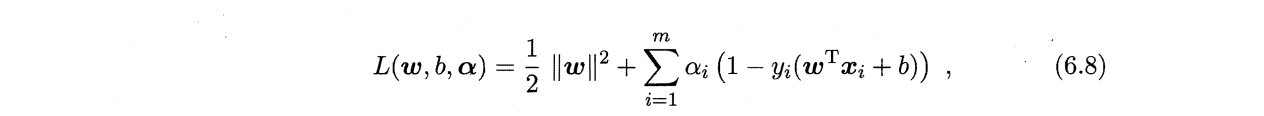 其中$\alpha=(\alpha_1;\alpha_2;...;\alpha_m)$，令$L(\omega, b, \alpha)$对$\omega$和$b$的偏导为0代回原式，可得到对偶问题
   $$\max\limits_\alpha \sum\limits^{m}_{i=1} \sum\limits^{m}_{j=1} \alpha_i \alpha_j y_i y_j x_i^T x_j
   \\s.t. \sum\limits^{m}_{i=1} \alpha_i y_i = 0,
   \\\alpha_i\geq 0, i= 1,2,...m.$$
   解出$\alpha$(二次规划算法或SMO)后，求出$\omega$和$b$即可得到模型$f(x)= \omega^Tx + b = \sum\limits^{m}_{i=1} \alpha_i y_i x_i^T x + b$
## 核函数
   现实任务中，原始样本空间内也许并不存在一个能正确划分两类样本的超平面。例如图 6.3 中的" 异或 问题就不是线性可分的。（网络加深一层相当于多加了一层逻辑）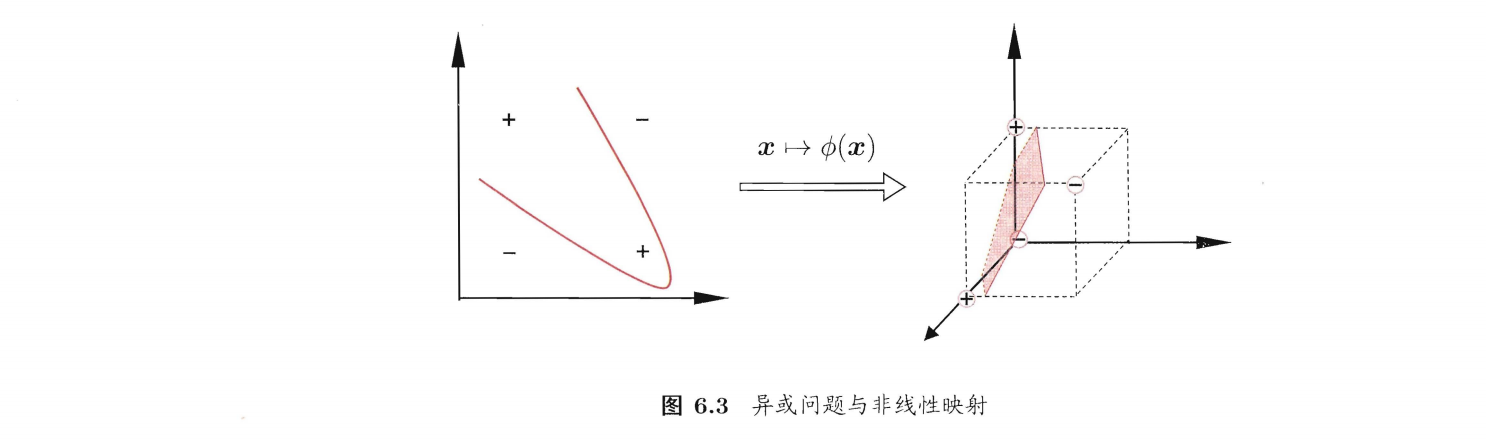
   对这样的问题可将样本从原始空间射到一个更高维的特征空间，使得样本在这个特征空间内线性可分。例如在图6.3中，若将原始的二维空间映射到一个合适的三维空间，就能找到一个合适的划分超平面。幸运的是，如果原始空间是有限维，即属性数有限，那么一定存在一个高维特征空间使样本可分。
   
   令$\phi(x)$表示将$x$映射后的特征向量，于是在特征空间中划分超平面所对应的模型可表示为$$f(x) = \omega^T \phi(x) + b $$, 类似上面的基本式，有$$\min\limits_{\omega,b} \frac{1}{2} ||\omega||^2 \\ s.t.  y_i(\omega^T\phi(x) + b)\geq 1, i = 1,2,...,m$$
   求解涉及计算内积$\phi^T(x) \phi(x)$，而特征空间可能是很高维甚至是无穷维的，所以设想一个函数：$\mathcal{k}(x_i, y_i) = \langle \phi(x_i), \phi(x_j)\rangle = \phi^T(x_i)\phi(x_j)$, 用这个函数来代替内积表示。（核技巧）
    $$\max\limits_\alpha \sum\limits^{m}_{i=1} \sum\limits^{m}_{j=1} \alpha_i \alpha_j y_i y_j \mathcal{k}(x_i, x_j)
   \\s.t. \sum\limits^{m}_{i=1} \alpha_i y_i = 0,
   \\\alpha_i\geq 0, i= 1,2,...m.$$ 
   求解后可得$$f(x) = \omega^T \phi(x) + b \\= \sum\limits^{m}_{i=1} \alpha_i y_i \phi^T(x_i) \phi(x) + b
   \\ =\sum\limits^{m}_{i=1} \alpha_i y_i \mathcal{k}(x_i, x) + b$$
   该式显示出模型的最优解可以通过训练样本的核函数展开，称为“支持向量展式”（support vector expansion）
   
   核函数是否存在？如何才为一个核函数？
   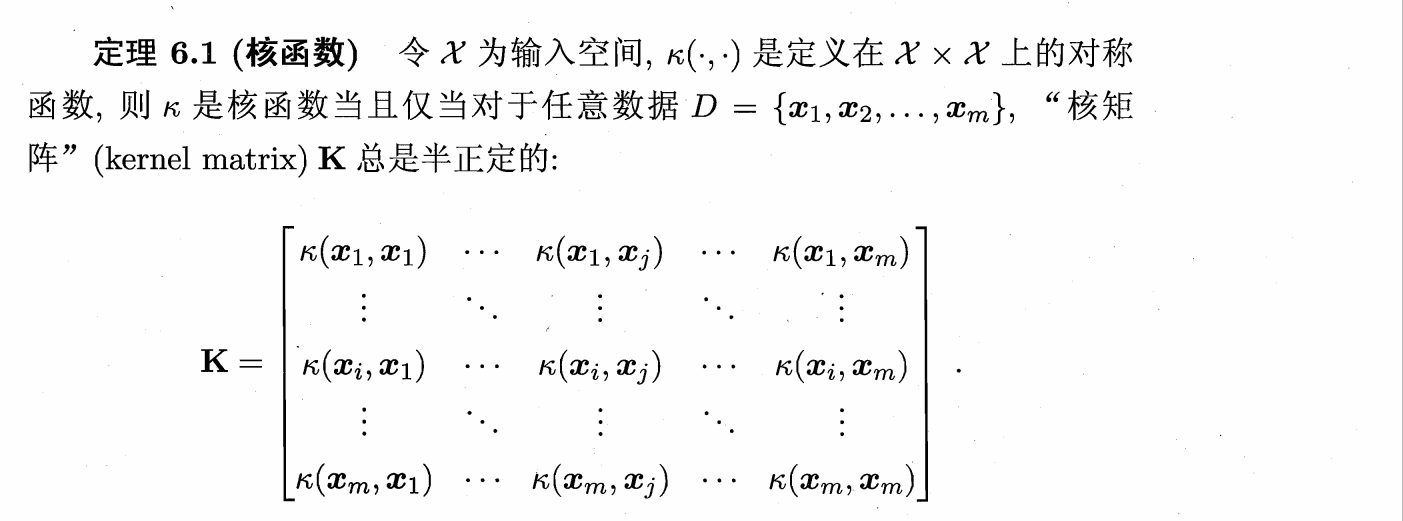
   即只要一个对称函数所对应的核矩阵半正定，它就能作为核函数使用.事实上，对于一个半正定核矩阵，总能找到一个与之对应的映射$\phi$. 换言之，任何一个核函数都隐式地定义了一个称为"再生核希尔伯特空间" (Reproducing Kernel Hilbert Space ，简称 RKHS) 的特征空间。我们希望样本在特征空间内线性可分，因此特征空间的好坏对支持向量机的性能至关重要.
   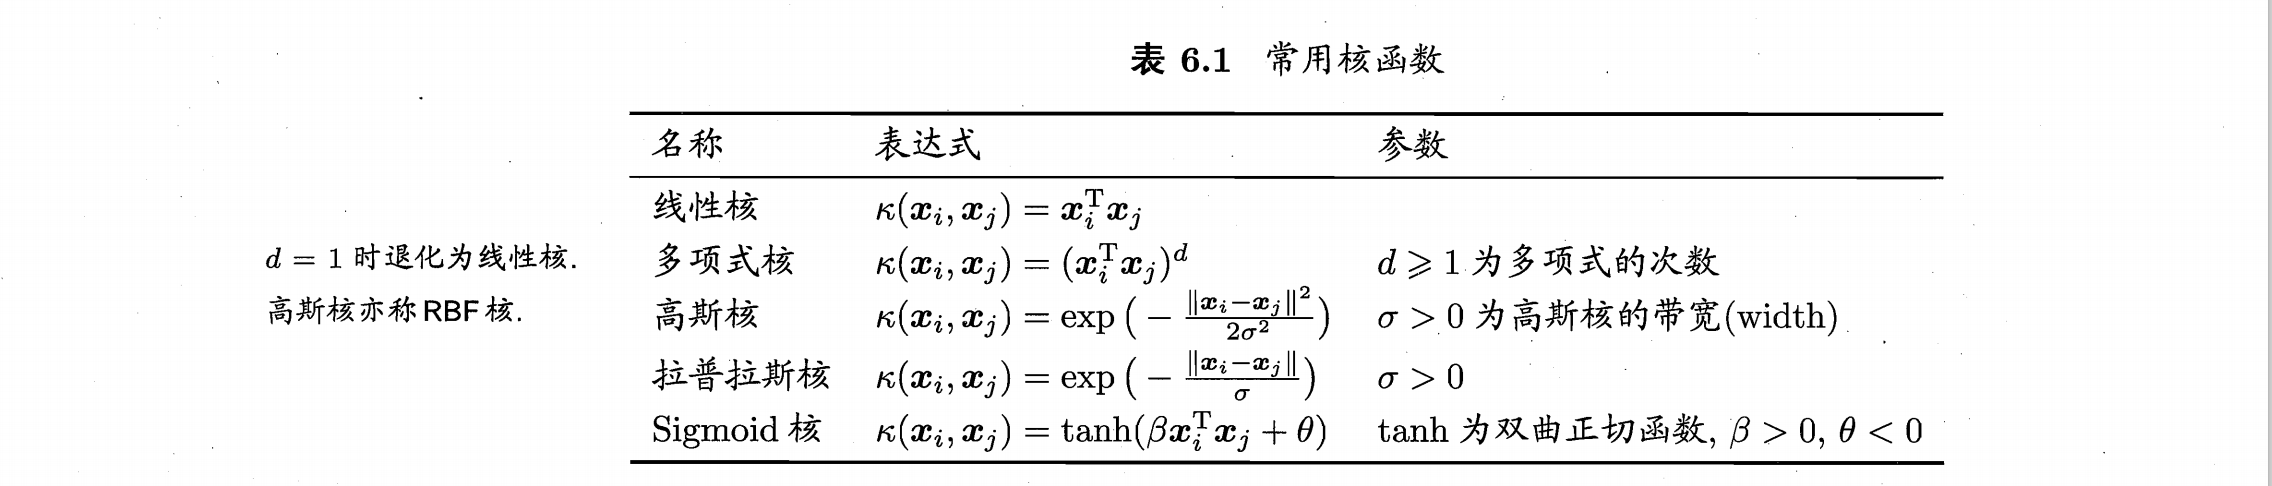
   核函数的线性组合、直积也都是核函数。
   
## 核方法
   由上面的SVM得知，若不考虑偏移b，学得的模型总能表示成核函数$\mathcal{k}(x,x_i)$的线性组合。于是有如下一般结论，表示定理：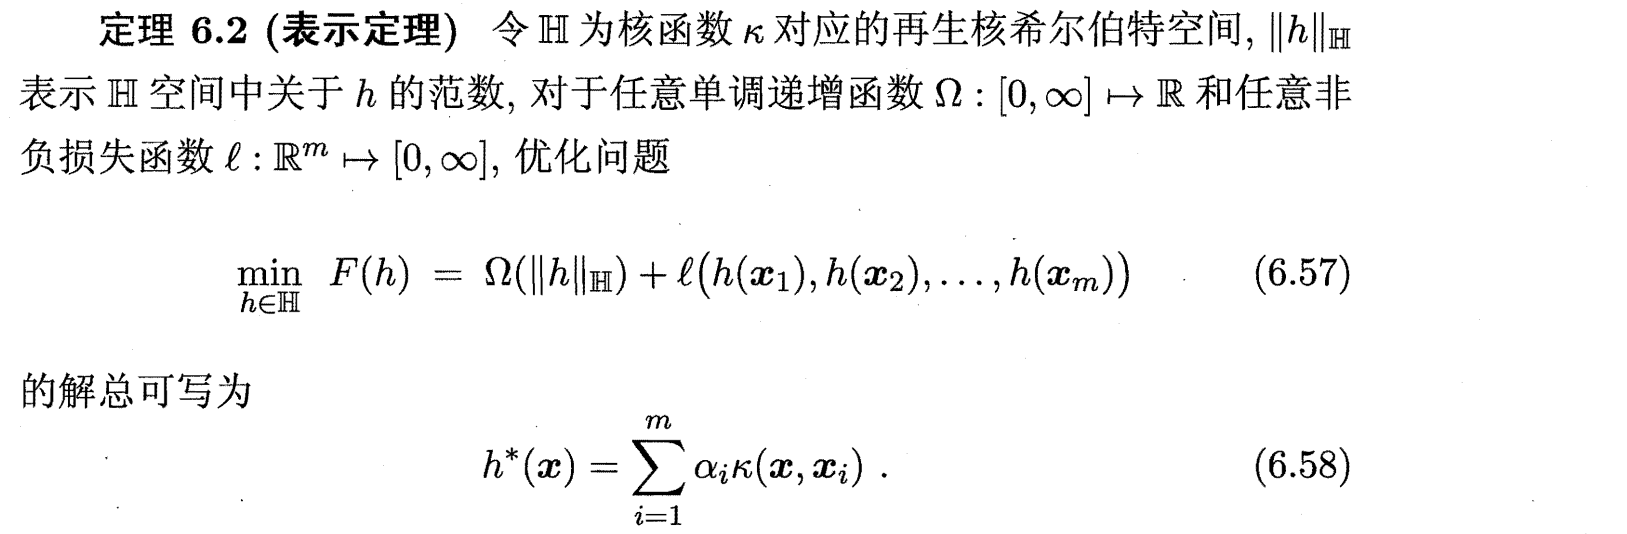
   表示应理对损失函数没有限制，对正则化项$\Omega$仅要求单调递增，甚至不要求是凸函数 意味着对于一般的损失函数和正则化项，优化问题(6.57) 的最优$h^{*}(x)$ 都可表示为核函数 $\mathcal(x, x_i)$的线性组合;这显示出核函数的巨大威力.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
np.random.seed(0)
x_xor= np.random.randn(200,2)
y_xor = np.logical_xor(x_xor[:,0]>0, x_xor[:,1]>0)
#numpy中自带逻辑判断的函数np.logical_xor(x1,x2)返回x1和x2异或逻辑后的布尔值


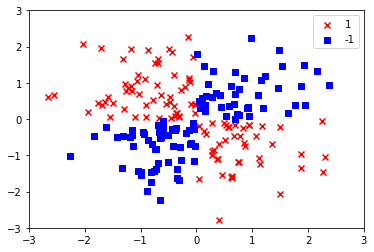

In [17]:
y_xor= np.where(y_xor,1,-1)
plt.scatter(x_xor[y_xor==1,0], x_xor[y_xor==1, 1], c='r',marker='x', label='1')
plt.scatter(x_xor[y_xor==-1,0], x_xor[y_xor==-1, 1], c = 'b', marker = 's', label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.show()

该数据集无法划分明确界限，这里使用高斯核（RBF）实现核方法的SVM。
实现方法就是使用

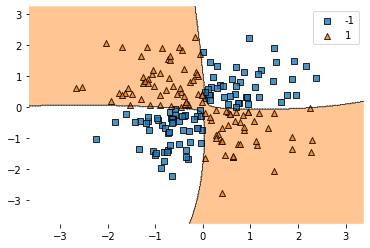

In [22]:
svm = SVC(kernel = 'rbf', random_state = 0, gamma = 0.1, C=3000.0)
##gamma 是核函数系数，只对‘rbf’,‘poly’，‘sigmond’有效；C是软间隔分类器的惩罚系数

svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor, clf = svm)
plt.legend(loc='best')
plt.show()